In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fc3_df = pd.read_csv('fc3.csv',encoding ='cp949')
fc4_df = pd.read_csv('fc4.csv',encoding ='cp949')
fc5_df = pd.read_csv('fc5.csv',encoding ='cp949')
fc6_df = pd.read_csv('fc6.csv',encoding ='cp949')

C:\Users\USER\Anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\USER\Anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
allFC_df = pd.concat([fc3_df,fc4_df, fc5_df, fc6_df])

In [5]:
#concatenate 한 df 를 csv 파일로 만들기
allFC_df.to_csv("allFC_df.csv")

In [6]:
allFC_df.loc[(allFC_df['CORP_ID']=='KX007'),'CORP_ID']='0'
allFC_df.loc[(allFC_df['CORP_ID']=='GP001'),'CORP_ID']='1'

In [7]:
allFC_df.drop(['REF_ORD_NO'],axis=1, inplace=True)
allFC_df.drop(['BKG_NO'],axis=1, inplace=True) 
allFC_df.drop(['REF_ITEM_SEQ'], axis=1, inplace = True)

In [8]:
allFC_df.drop(['SHPR_CD', 'ITEM_SEQ', 'BRAND_NM'],axis=1, inplace=True)
allFC_df.drop(['IF_YN','ORDER_CRT_DATETIME','INS_ID','INS_DATE','INS_TIME'],axis =1, inplace = True)
allFC_df= allFC_df.drop(['ORDER_IDX','ORDER_YN','DLVPREARREMPNICKNM'],axis =1, inplace = False)

In [9]:
allFC_df.isna()

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676907,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True
676908,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True
676909,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True
676910,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True


In [10]:
allFC_df.isna().sum() #칼럼별 NaN값 개수 확인 꺄악 다시 돌려버려서 다 0됨..ㅠㅠ

CORP_ID                 0
BKG_TYP                 0
BKG_DATE                0
BKG_TIME                0
INV_AMT             28011
ITEM_CD                 0
ITEM_QTY                0
ITEM_AMT            18730
DLV_DV               1043
DLVPREARRBRANCD      1043
DLVCLSFCD            1043
DLVSUBCLSFCD         1150
POST_ZONE            1043
SPLIT_EXEC_YN           0
SHPR_ADDR_1             0
SHPR_ADDR_2        109251
CNEE_ADDR_1            35
CNEE_ADDR_2         35977
dtype: int64

In [11]:
pd.DataFrame(allFC_df.isna().sum()).transpose()

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,0,0,0,28011,0,0,18730,1043,1043,1043,1150,1043,0,0,109251,35,35977


In [12]:
allFC_df['INV_AMT'] = allFC_df['INV_AMT'].fillna(allFC_df['INV_AMT'].mean())
allFC_df['ITEM_AMT'] = allFC_df['ITEM_AMT'].fillna(allFC_df['ITEM_AMT'].mean())

In [13]:
allFC_df.isna().sum()

CORP_ID                 0
BKG_TYP                 0
BKG_DATE                0
BKG_TIME                0
INV_AMT                 0
ITEM_CD                 0
ITEM_QTY                0
ITEM_AMT                0
DLV_DV               1043
DLVPREARRBRANCD      1043
DLVCLSFCD            1043
DLVSUBCLSFCD         1150
POST_ZONE            1043
SPLIT_EXEC_YN           0
SHPR_ADDR_1             0
SHPR_ADDR_2        109251
CNEE_ADDR_1            35
CNEE_ADDR_2         35977
dtype: int64

In [14]:
numerics=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = allFC_df.select_dtypes(include = numerics).columns

In [15]:
allFC_df.loc[allFC_df[num_cols].isna().sum(axis=1)>0, num_cols].head()

,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_QTY,ITEM_AMT,DLV_DV,POST_ZONE
22,8,20210302,184700,73518.623345,2080,53957.716636,NaN,NaN
41850,8,20210305,91535,73518.623345,480,0.000000,NaN,NaN
41851,8,20210305,91535,73518.623345,860,0.000000,NaN,NaN
41852,8,20210305,91535,73518.623345,72,0.000000,NaN,NaN
41853,8,20210305,91535,73518.623345,201,0.000000,NaN,NaN


In [16]:
numerics=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

allFC_df[allFC_df.select_dtypes(include=numerics).columns] = allFC_df[allFC_df.select_dtypes(include=numerics).columns].fillna(0)

In [17]:
allFC_df.isna().sum()

CORP_ID                 0
BKG_TYP                 0
BKG_DATE                0
BKG_TIME                0
INV_AMT                 0
ITEM_CD                 0
ITEM_QTY                0
ITEM_AMT                0
DLV_DV                  0
DLVPREARRBRANCD      1043
DLVCLSFCD            1043
DLVSUBCLSFCD         1150
POST_ZONE               0
SPLIT_EXEC_YN           0
SHPR_ADDR_1             0
SHPR_ADDR_2        109251
CNEE_ADDR_1            35
CNEE_ADDR_2         35977
dtype: int64

DLV_DV(택배구분) / POST_ZONE(권역구분) -> 0으로 처리

In [18]:
not_num_cols = [x for x in allFC_df.columns if x not in num_cols]

allFC_df.loc[allFC_df[not_num_cols].isna().sum(axis=1)>0, not_num_cols].head()

,CORP_ID,ITEM_CD,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,134265392,7484,5Z73,1,N,세종특별자치시,NaN,서울특별시,서대문구
7,0,603215395_1,M54T,6N20,1p,N,세종특별자치시,NaN,부산광역시,연제구
21,0,228550165,7484,5Z73,1,N,세종특별자치시,NaN,서울특별시,서대문구
22,0,114585,NaN,NaN,NaN,N,경기,광주시,경기,광주시
24,0,3735258297,4830,4J30,1,N,세종특별자치시,NaN,서울특별시,관악구


In [19]:
allFC_df['SHPR_ADDR_2']= allFC_df['SHPR_ADDR_2'].fillna('S')
allFC_df['CNEE_ADDR_1']=allFC_df['CNEE_ADDR_1'].fillna('S')
allFC_df['CNEE_ADDR_2'] = allFC_df['CNEE_ADDR_2'].fillna('S')
allFC_df['DLVPREARRBRANCD'] = allFC_df['DLVPREARRBRANCD'].fillna('xxxxx')
allFC_df['DLVCLSFCD'] = allFC_df['DLVCLSFCD'].fillna('xxxxx')
allFC_df['DLVSUBCLSFCD'] = allFC_df['DLVSUBCLSFCD'].fillna('xxxxx')

In [20]:
allFC_df.isna().sum()

CORP_ID            0
BKG_TYP            0
BKG_DATE           0
BKG_TIME           0
INV_AMT            0
ITEM_CD            0
ITEM_QTY           0
ITEM_AMT           0
DLV_DV             0
DLVPREARRBRANCD    0
DLVCLSFCD          0
DLVSUBCLSFCD       0
POST_ZONE          0
SPLIT_EXEC_YN      0
SHPR_ADDR_1        0
SHPR_ADDR_2        0
CNEE_ADDR_1        0
CNEE_ADDR_2        0
dtype: int64

### !!! 지역별 상품 수요량 파악하기 !!! - 예진아 파이팅

#### 1) 수화인 주소 통일하기.... 힘드렁

In [21]:
allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='서울시') | 
             (allFC_df['CNEE_ADDR_1']=='강서구') |
             (allFC_df['CNEE_ADDR_1']=='서울') |
             (allFC_df['CNEE_ADDR_1']=='마포구') |
             (allFC_df['CNEE_ADDR_1']=='영등포구') |
             (allFC_df['CNEE_ADDR_1']=='중구') |
             (allFC_df['CNEE_ADDR_1']=='?서울시') |
             (allFC_df['CNEE_ADDR_1']=='울특별시'), 'CNEE_ADDR_1']='서울특별시'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='강원'), 'CNEE_ADDR_1']='강원도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='경기') | 
             (allFC_df['CNEE_ADDR_1']=='경기도수원시') |
             (allFC_df['CNEE_ADDR_1']=='(12730)') |
             (allFC_df['CNEE_ADDR_1']=='곤지암') |
             (allFC_df['CNEE_ADDR_1']=='평택시') |
             (allFC_df['CNEE_ADDR_1']=='(13279)') |
             (allFC_df['CNEE_ADDR_1']=='(13499)') |
             (allFC_df['CNEE_ADDR_1']=='(14782)') |
             (allFC_df['CNEE_ADDR_1']=='[16817]') |
             (allFC_df['CNEE_ADDR_1']=='경기도시흥시') |
             (allFC_df['CNEE_ADDR_1']=='\t경기도') |
             (allFC_df['CNEE_ADDR_1']=='화성시'), 'CNEE_ADDR_1']='경기도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='경남') |
             (allFC_df['CNEE_ADDR_1']=='경삼남도') |
             (allFC_df['CNEE_ADDR_1']=='(53298)'), 'CNEE_ADDR_1']='경상남도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='경북') |
             (allFC_df['CNEE_ADDR_1']=='상주시') |
             (allFC_df['CNEE_ADDR_1']=='영천시') |
             (allFC_df['CNEE_ADDR_1']=='태종로711번길'), 'CNEE_ADDR_1']='경상북도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='광주'), 'CNEE_ADDR_1']='광주광역시'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='대구') |
             (allFC_df['CNEE_ADDR_1']=='대구시'), 'CNEE_ADDR_1']='대구광역시'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='대전'), 'CNEE_ADDR_1']='대전광역시'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='부산') |
             (allFC_df['CNEE_ADDR_1']=='부산시'), 'CNEE_ADDR_1']='부산광역시'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='인천') |
             (allFC_df['CNEE_ADDR_1']=='인천시') |
             (allFC_df['CNEE_ADDR_1']=='인천광역시?서구?정서진로?47') |
             (allFC_df['CNEE_ADDR_1']=='(22738)') |
             (allFC_df['CNEE_ADDR_1']=='인천광역시미추홀구'), 'CNEE_ADDR_1']='인천광역시'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='울산'), 'CNEE_ADDR_1']='울산광역시'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='전남') |
             (allFC_df['CNEE_ADDR_1']=='전남목포시'), 'CNEE_ADDR_1']='전라남도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='전북'), 'CNEE_ADDR_1']='전라북도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='충남') |
             (allFC_df['CNEE_ADDR_1']=='충남금산군') |
             (allFC_df['CNEE_ADDR_1']=='청남도'), 'CNEE_ADDR_1']='충청남도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='충북') |
             (allFC_df['CNEE_ADDR_1']=='청주시'), 'CNEE_ADDR_1']='충청북도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='제주'), 'CNEE_ADDR_1']='제주특별자치도'

allFC_df.loc[(allFC_df['CNEE_ADDR_1']=='세종') |
             (allFC_df['CNEE_ADDR_1']=='세종시') |
             (allFC_df['CNEE_ADDR_1']=='종시') |
             (allFC_df['CNEE_ADDR_1']=='(30100)'), 'CNEE_ADDR_1']='세종특별자치시'

#### 2) 그 이상한 주소 하나 버리기

In [22]:
idx = allFC_df[allFC_df['CNEE_ADDR_1']=='道路名稱首爾特別市中區麻將路1街22號（STUDIO'].index
allFC_df.drop(idx, inplace = True)

In [23]:
#idx2 = allFC_df[allFC_df['CNEE_ADDR_1']=='S'].index
#allFC_df.drop(idx2, inplace = True)

#### 3) 3시 반 드디어 groupby 시작

In [24]:
allFC_df_ext = allFC_df[['CNEE_ADDR_1', 'ITEM_CD','CORP_ID']]

In [25]:
allFC_df_groupby = allFC_df_ext.groupby(by=['CNEE_ADDR_1', 'ITEM_CD'])

In [26]:
allFC_df_groupby.count()

CORP_ID
CNEE_ADDR_1 ITEM_CD                
S           10555566              1
            18809566172065        4
            4748857542_4          1
            5406140018            1
            6079851               1
...                             ...
충청북도        shop0001673           1
            shop0001676           1
            shop0001680           1
            whole800001          18
            whole800002          32

[133022 rows x 1 columns]

 음...... 난 저 ITEM_CD를 column으로 하고싶은데,,,,,
 얘들아 난 여기서 더 이상 저거를 컬럼으로 만들 자신이 없어.
 우리 내일 열심히 토론해보자....
 파이팅이다!!!

#### 4) pivot table로 해보기

In [27]:
allFC_df_pivot = pd.pivot_table(allFC_df_ext, index = 'CNEE_ADDR_1',
                               columns = 'ITEM_CD', values = 'CORP_ID',
                               aggfunc = 'count', fill_value = 0)

In [28]:
allFC_df_pivot

ITEM_CD,0001,0003,00062,00083,00085,00183,00210413,00224,00241,00263,...,shop0001673,shop0001674,shop0001675,shop0001676,shop0001677,shop0001678,shop0001679,shop0001680,whole800001,whole800002
CNEE_ADDR_1,,,,,,,,,,,,,,,,,,,,,
S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
강원도,47,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,27,35
경기도,320,2,1,1,1,1,1,1,1,1,...,3,0,3,6,1,2,2,1,241,333
경상남도,93,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,2,1,0,77,110
경상북도,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,41,79
광주광역시,33,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,23,43
대구광역시,69,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,39,57
대전광역시,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,19,39
부산광역시,60,0,0,0,0,0,1,0,0,0,...,1,1,0,1,1,0,0,0,63,91


In [29]:
allFC_df_pivot['121174432_8']

CNEE_ADDR_1
S            0
강원도         79
경기도        885
경상남도       218
경상북도       135
광주광역시      111
대구광역시      124
대전광역시      111
부산광역시      177
서울특별시      622
세종특별자치시     26
울산광역시       69
인천광역시      175
전라남도       109
전라북도       111
제주특별자치도     29
충청남도       124
충청북도        96
Name: 121174432_8, dtype: int64

In [30]:
allFC_df_des = allFC_df_pivot.describe()
allFC_df_des

ITEM_CD,0001,0003,00062,00083,00085,00183,00210413,00224,00241,00263,...,shop0001673,shop0001674,shop0001675,shop0001676,shop0001677,shop0001678,shop0001679,shop0001680,whole800001,whole800002
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,70.611111,0.222222,0.055556,0.055556,0.055556,0.055556,0.111111,0.055556,0.055556,0.055556,...,0.444444,0.111111,0.333333,1.166667,0.166667,0.333333,0.444444,0.111111,49.111111,74.722222
std,79.633823,0.548319,0.235702,0.235702,0.235702,0.235702,0.323381,0.235702,0.235702,0.235702,...,0.783823,0.323381,0.766965,1.757338,0.383482,0.685994,0.704792,0.323381,59.107966,81.826075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,34.250000
50%,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,32.500000,50.500000
75%,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.750000,0.000000,0.000000,1.000000,0.000000,48.250000,75.750000
max,320.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,3.000000,6.000000,1.000000,2.000000,2.000000,1.000000,241.000000,333.000000


In [31]:
allFC_df_max = allFC_df_des.loc['max',:]
allFC_df_max

ITEM_CD
0001           320.0
0003             2.0
00062            1.0
00083            1.0
00085            1.0
               ...  
shop0001678      2.0
shop0001679      2.0
shop0001680      1.0
whole800001    241.0
whole800002    333.0
Name: max, Length: 16951, dtype: float64

In [32]:
allFC_df_min = allFC_df_des.loc['min',:] # 각 품목의 최소개수
allFC_df_min1 = allFC_df_min[allFC_df_min==0] # 그 각 품목의 최소 개수가 0인 것 -> 해당되지 않는 나머지 1803개는 모든 지역에서 다 시키는 것
allFC_df_min1

ITEM_CD
0001           0.0
0003           0.0
00062          0.0
00083          0.0
00085          0.0
              ... 
shop0001678    0.0
shop0001679    0.0
shop0001680    0.0
whole800001    0.0
whole800002    0.0
Name: min, Length: 16947, dtype: float64

In [33]:
# 최소 개수가 0인 품목의 최대 개수
allFC_df_min2 = allFC_df_des.loc['max',allFC_df_min==0]
allFC_df_min2.describe()

count    16947.000000
mean        30.570248
std        128.479919
min          1.000000
25%          1.000000
50%          4.000000
75%         17.000000
max       7451.000000
Name: max, dtype: float64

In [34]:
allFC_df_min2[allFC_df_min2 > 10]

ITEM_CD
0001           320.0
100026          44.0
100028          18.0
100032          35.0
100033          34.0
               ...  
shop0001653     11.0
shop0001658     14.0
shop0001670     26.0
whole800001    241.0
whole800002    333.0
Name: max, Length: 5464, dtype: float64

In [35]:
allFC_df_pivot['138632647_9']

CNEE_ADDR_1
S            0
강원도         10
경기도        111
경상남도        24
경상북도        20
광주광역시       18
대구광역시       24
대전광역시       11
부산광역시       49
서울특별시      136
세종특별자치시      0
울산광역시        9
인천광역시       29
전라남도        19
전라북도        16
제주특별자치도      1
충청남도        13
충청북도         9
Name: 138632647_9, dtype: int64

In [36]:
# 최소 개수가 0아 아닌 품목의 최대 개수 (모든 지역이 시키는 품목의 최대 개수)
allFC_df_min3 = allFC_df_des.loc['max',allFC_df_min!=0]
allFC_df_min3.describe()

count      4.00000
mean     247.25000
std       86.15635
min      145.00000
25%      191.50000
50%      260.50000
75%      316.25000
max      323.00000
Name: max, dtype: float64

In [37]:
allFC_df_min3[allFC_df_min3<60]

Series([], Name: max, dtype: float64)

In [38]:
# 최소개수가 10개인 품목의 지역별 개수 -> 이걸 살릴지 말지 결정해야 할 듯
allFC_df_pivot['405135877_2']

CNEE_ADDR_1
S           0
강원도         3
경기도         8
경상남도        3
경상북도        2
광주광역시       1
대구광역시       3
대전광역시       2
부산광역시       1
서울특별시      10
세종특별자치시     1
울산광역시       1
인천광역시       3
전라남도        1
전라북도        1
제주특별자치도     1
충청남도        2
충청북도        2
Name: 405135877_2, dtype: int64

## ---정리하겠습니다!---

### > 품목 개수 : 16933
### > 모든 지역에서 시키는 품목 개수 : 1803
#### 그러면 이걸 다 살리느냐??? -> 1803개의 품목을 더 자세히 살펴봄
모든 지역이 다 시키지만 다 조금조금씩 시키는 품목도 있음

ex) '405135877_2' 품목은 모든 지역에서 다 시키지만 최대 개수는 서울에서 시키는 10개임 (최대 10개, 최소 1개 시켰다는 말)
### > 최소 주문 개수가 0개인 품목 개수 : 15130 (모든 지역에서 다 시키지는 않는 품목)
#### 이 15130개 품목 중에서 어떤 품목을 살릴 지 결정해야함 -> 자세히 살펴봄
이 품목들 중에서 75%는 전체 지역 통틀어서 시킨 개수의 최댓값이 10개임 (최대 10개, 최소 0개 시켰다는 말)

10개는 적으니깐 75% 버려도 되는거 아닌가? 라고 생각이 들 법도 하지만 위에서 예로 든 '405135877_2'품목을 살펴보면 그케 다르지 않음을 알 수 있음

그리고 최소 개수가 0개이지만 최대 개수가 582개인 품목도 있음 -> 이런건 그냥 한 지역에서만 안시킨 거지 무조건 포함되어야 하는 품목

### >>> 그렇다면 어떤 품목을 살리고, 어떤 품목을 버려야 할까? (생각해봐야할 거리를 던지겠습니다)
이건 진짜 너무 모르겠다....
#### 우선 모든 지역에서 시키는 품목부터!
이것들을 다 살리기엔 각 지역에서 시키는 개수가 너무 적은 품목도 있음 (위에서 든 예시)

이 품목의 최대 개수를 살펴봤을 때

mean      206.515807

std       343.092177

min        10.000000

25%        60.000000

50%       110.000000

75%       216.500000

max      7451.000000

뭔가 어느 순간을 기준으로 숫자가 뻥 뛴다?는 느낌이 드는 기준이 애매함.

그렇다고 75%에서 끊기에는 216개라는 개수는 너무 많은 개수임.
#### 모든 지역에서 다 시키지는 않는 품목은?
이 품목의 최대 개수를 살펴봤을 때

mean         9.695704

std         18.889171

min          1.000000

25%          1.000000

50%          3.000000

75%         10.000000

max        582.000000

이건 그나마 조금은 명확할 수도 있는게 최대 개수의 평균이 9개라는 건 어느 지역에서도 그렇게 많이 시키지는 않는다는 것.

그리고 75%랑 max의 숫자가 극명하게 차이나기 때문에, 75% 기준으로 끊는게 어느정도 타당할 수 있다고 생각함.


### 그래서 결론 --> 얘들아 도와줘

In [39]:
allFC_df_25 = allFC_df_des.loc['25%',:]
allFC_df_25

ITEM_CD
0001           33.50
0003            0.00
00062           0.00
00083           0.00
00085           0.00
               ...  
shop0001678     0.00
shop0001679     0.00
shop0001680     0.00
whole800001    18.25
whole800002    34.25
Name: 25%, Length: 16951, dtype: float64

## 이제 여기부터 사용!! 앞에는 다 전처리 과정이고 이 파일이 전처리 된 csv 불러온거

In [40]:
pre_allFC = pd.read_csv("pre_allFC.csv")
pre_allFC.drop(['Unnamed: 0'], axis = 1, inplace = True)
pre_allFC

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,BKG_DATE2,day
0,0,7,20210303,35510,22400.0,134265392,1,14900.0,1.0,7484,5Z73,1,3.0,N,세종특별자치시,S,서울특별시,서대문구,2021-03-03,3
1,0,7,20210303,35521,20900.0,4610261043_2,1,20900.0,1.0,6427,6R67,4,50.0,N,경기도,광주시,경상남도,김해시,2021-03-03,3
2,0,7,20210303,35513,37900.0,4936599538_1,1,37900.0,1.0,6158,9Y25,0,53.0,N,경기도,광주시,경상남도,거제시,2021-03-03,3
3,0,7,20210303,35608,69800.0,3858391637_1,1,69800.0,1.0,8909,1N65,1,6.0,N,경기도,광주시,서울특별시,서초구,2021-03-03,3
4,0,7,20210303,35551,73700.0,4631307460,1,39800.0,1.0,2777,3D84,1,10.0,N,경기도,광주시,경기도,김포시,2021-03-03,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786367,1,7,20210628,91210,0.0,00281,100,0.0,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,S,2021-06-28,28
1786368,1,7,20210628,91210,0.0,00316,168,0.0,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,S,2021-06-28,28
1786369,1,7,20210628,91210,0.0,00338,100,0.0,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,S,2021-06-28,28
1786370,1,7,20210628,91210,0.0,00183,50,0.0,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,S,2021-06-28,28


## 이제 지역별로 데이터를 쪼개 봅시다!

In [41]:
allFC_df

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,7,20210303,35510,22400.000000,134265392,1,14900.000000,1.0,7484,5Z73,1,3.0,N,세종특별자치시,S,서울특별시,서대문구
1,0,7,20210303,35521,20900.000000,4610261043_2,1,20900.000000,1.0,6427,6R67,4,50.0,N,경기도,광주시,경상남도,김해시
2,0,7,20210303,35513,37900.000000,4936599538_1,1,37900.000000,1.0,6158,9Y25,0,53.0,N,경기도,광주시,경상남도,거제시
3,0,7,20210303,35608,69800.000000,3858391637_1,1,69800.000000,1.0,8909,1N65,1,6.0,N,경기도,광주시,서울특별시,서초구
4,0,7,20210303,35551,73700.000000,4631307460,1,39800.000000,1.0,2777,3D84,1,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676907,1,7,20210628,91210,73518.623345,00281,100,53957.716636,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,S
676908,1,7,20210628,91210,73518.623345,00316,168,53957.716636,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,S
676909,1,7,20210628,91210,73518.623345,00338,100,53957.716636,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,S
676910,1,7,20210628,91210,73518.623345,00183,50,53957.716636,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,S


In [42]:
allFC_df['CNEE_ADDR_1'].unique()

array(['서울특별시', '경상남도', '경기도', '부산광역시', '대전광역시', '전라북도', '충청남도', '경상북도',
       '인천광역시', '강원도', '전라남도', '대구광역시', '세종특별자치시', '충청북도', '울산광역시',
       '광주광역시', '제주특별자치도', 'S'], dtype=object)

In [43]:
for i in allFC_df['CNEE_ADDR_1'].unique():
    FC_region = allFC_df[allFC_df['CNEE_ADDR_1']==i]
    FC_region.to_csv("FC_df_{}.csv".format(i), sep=',')

In [44]:
FC_df_서울특별시 = pd.read_csv('FC_df_서울특별시.csv')
FC_df_경상남도 = pd.read_csv('FC_df_경상남도.csv')
FC_df_경기도 = pd.read_csv('FC_df_경기도.csv')
FC_df_부산광역시 = pd.read_csv('FC_df_부산광역시.csv')
FC_df_대전광역시 = pd.read_csv('FC_df_대전광역시.csv')
FC_df_전라북도 = pd.read_csv('FC_df_전라북도.csv')
FC_df_충청남도 = pd.read_csv('FC_df_충청남도.csv')
FC_df_경상북도 = pd.read_csv('FC_df_경상북도.csv')
FC_df_인천광역시 = pd.read_csv('FC_df_인천광역시.csv')
FC_df_강원도 = pd.read_csv('FC_df_강원도.csv')
FC_df_전라남도 = pd.read_csv('FC_df_전라남도.csv')
FC_df_대구광역시 = pd.read_csv('FC_df_대구광역시.csv')
FC_df_세종특별자치시 = pd.read_csv('FC_df_세종특별자치시.csv')
FC_df_충청북도 = pd.read_csv('FC_df_충청북도.csv')
FC_df_울산광역시 = pd.read_csv('FC_df_울산광역시.csv')
FC_df_광주광역시 = pd.read_csv('FC_df_광주광역시.csv')
FC_df_제주특별자치도 = pd.read_csv('FC_df_제주특별자치도.csv')
FC_df_S = pd.read_csv('FC_df_S.csv')

C:\Users\USER\Anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\USER\Anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [45]:
FC_df_대구광역시

,Unnamed: 0,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,48,0,7,20210301,1051,178800.0,4824189340_2,1,178800.0,1.0,K18A,5E30,2t,42.0,N,경기도,광주시,대구광역시,수성구
1,58,0,7,20210301,2909,200700.0,4658408144_1,3,200700.0,1.0,766,5Z57,2d,42.0,N,경기도,광주시,대구광역시,달성군
2,84,0,7,20210301,1445,29700.0,160659080,3,29700.0,1.0,K17V,5F40,2t,42.0,N,세종특별자치시,S,대구광역시,달서구
3,144,0,7,20210301,141,10900.0,4861386623_4,1,10900.0,1.0,7079,5Z59,0t,41.0,N,경기도,광주시,대구광역시,북구
4,187,0,7,20210301,10343,70400.0,550695708_9,1,70400.0,1.0,K18A,5E30,2t,42.0,N,경기도,광주시,대구광역시,수성구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76260,676686,0,7,20210630,81355,27900.0,232155349_1,1,27900.0,1.0,9310,5Z59,1t,41.0,N,경기도,광주시,대구광역시,북구
76261,676714,1,7,20210630,95835,30000.0,5389247877,1,30000.0,1.0,8854,6R39,1t,41.0,N,세종특별자치시,S,대구광역시,동구
76262,676745,1,7,20210630,100711,69000.0,2055185493,1,69000.0,1.0,766,5Z57,2d,42.0,N,세종특별자치시,S,대구광역시,달성군
76263,676753,1,7,20210630,100732,70000.0,4427993909,1,70000.0,1.0,7056,5E30,00,41.0,N,세종특별자치시,S,대구광역시,중구


## 우선 품목 하나 떼어서 시간별 수요량을 파악해 봅시다!

In [46]:
item_date = allFC_df[['ITEM_CD', 'BKG_DATE']]
item_date

,ITEM_CD,BKG_DATE
0,134265392,20210303
1,4610261043_2,20210303
2,4936599538_1,20210303
3,3858391637_1,20210303
4,4631307460,20210303
...,...,...
676907,00281,20210628
676908,00316,20210628
676909,00338,20210628
676910,00183,20210628


In [94]:
item01 = item_date[item_date['ITEM_CD']=='8809528221612']
item01

,ITEM_CD,BKG_DATE
337578,8809528221612,20210527
337579,8809528221612,20210527
337580,8809528221612,20210527
337581,8809528221612,20210527
337582,8809528221612,20210527
...,...,...
675136,8809528221612,20210630
675589,8809528221612,20210629
676676,8809528221612,20210630
676750,8809528221612,20210630


In [95]:
item01_date = item01.groupby(by='BKG_DATE').count()
item01_date

,ITEM_CD
BKG_DATE,
20210527,43
20210531,72
20210601,100
20210602,84
20210603,85
20210604,45
20210605,44
20210606,73
20210607,96


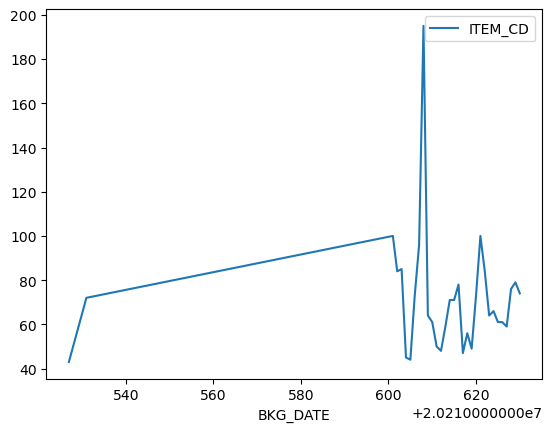

In [96]:
item01_date.plot()
plt.show()

In [50]:
all_item_date = item_date.groupby(['BKG_DATE', 'ITEM_CD'])
all_item_date_count = all_item_date.size()
all_item_date_count

BKG_DATE  ITEM_CD    
20210301  100118          1
          100119          3
          100121         10
          100123          6
          100124          1
                         ..
20210630  shop0001677     2
          shop0001678     1
          shop0001680     1
          whole800001    21
          whole800002    31
Length: 304803, dtype: int64

In [51]:
all_item_date_unstack = all_item_date_count.unstack(fill_value=0)
all_item_date_unstack

ITEM_CD,0001,0003,00062,00083,00085,00183,00210413,00224,00241,00263,...,shop0001673,shop0001674,shop0001675,shop0001676,shop0001677,shop0001678,shop0001679,shop0001680,whole800001,whole800002
BKG_DATE,,,,,,,,,,,,,,,,,,,,,
20210301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20210626,6,0,0,0,0,0,0,0,0,0,...,2,0,1,3,0,3,2,0,16,16
20210627,12,0,0,0,0,0,0,0,0,0,...,0,0,1,3,0,1,1,1,20,21
20210628,10,0,1,1,1,1,0,1,1,1,...,4,0,2,5,1,1,0,0,16,33


In [52]:
i=0
while i < 20:
    all_item_date_unstack[i:i+1] = all_item_date_unstack[i:i+7].sum()
    all_item_date_unstack.drop(all_item_date_unstack.index[i+1:i+7], inplace = True)
    i += 1

In [53]:
all_item_date_unstack

ITEM_CD,0001,0003,00062,00083,00085,00183,00210413,00224,00241,00263,...,shop0001673,shop0001674,shop0001675,shop0001676,shop0001677,shop0001678,shop0001679,shop0001680,whole800001,whole800002
BKG_DATE,,,,,,,,,,,,,,,,,,,,,
20210301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210419,69,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210426,213,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
all_item_describe = all_item_date_unstack.describe()
all_item_describe

ITEM_CD,0001,0003,00062,00083,00085,00183,00210413,00224,00241,00263,...,shop0001673,shop0001674,shop0001675,shop0001676,shop0001677,shop0001678,shop0001679,shop0001680,whole800001,whole800002
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,70.611111,0.222222,0.055556,0.055556,0.055556,0.055556,0.111111,0.055556,0.055556,0.055556,...,0.444444,0.111111,0.333333,1.166667,0.166667,0.333333,0.444444,0.111111,49.111111,74.722222
std,89.043373,0.548319,0.235702,0.235702,0.235702,0.235702,0.323381,0.235702,0.235702,0.235702,...,1.464169,0.471405,1.028992,3.434256,0.707107,1.028992,1.338226,0.323381,86.309218,128.754123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,90.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.500000,85.500000
max,341.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,2.000000,4.000000,12.000000,3.000000,4.000000,5.000000,1.000000,257.000000,368.000000


## 상품코드별 표준편차, FC만 csv로 뽑기

In [55]:
all_item_std = all_item_date_unstack.std()
all_item_std = pd.DataFrame(all_item_std)
all_item_std.columns = ['std']
all_item_std

,std
ITEM_CD,
0001,89.043373
0003,0.548319
00062,0.235702
00083,0.235702
00085,0.235702
...,...
shop0001678,1.028992
shop0001679,1.338226
shop0001680,0.323381


In [99]:
all_item_std[all_item_std['std'] > 9]

,std
ITEM_CD,
0001,89.043373
100026,10.562141
100119,13.856996
100121,36.881722
100123,34.684385
...,...
shop0001650,17.677670
shop0001658,15.556349
shop0001670,20.977501


In [122]:
all_item_std.describe()

,std,Log_col
count,16951.000000,16951.000000
mean,9.061218,1.206322
std,36.423448,1.133126
min,0.235702,0.211639
25%,0.460889,0.379045
50%,1.195033,0.786197
75%,4.316142,1.670748
max,1153.576105,7.051489


In [58]:
FC_item =allFC_df[['CORP_ID', 'ITEM_CD']]
FC_item_ext = FC_item.drop_duplicates()
FC_item_ext.set_index(keys=['ITEM_CD'], inplace = True)

In [59]:
FC_item_ext

,CORP_ID
ITEM_CD,
134265392,0
4610261043_2,0
4936599538_1,0
3858391637_1,0
4631307460,0
...,...
00263,1
00281,1
00316,1


In [60]:
FC_item_std = all_item_std.join(FC_item_ext)
FC_item_std

,std,CORP_ID
ITEM_CD,,
0001,89.043373,0
0003,0.548319,0
00062,0.235702,1
00083,0.235702,1
00085,0.235702,1
...,...,...
shop0001678,1.028992,1
shop0001679,1.338226,1
shop0001680,0.323381,1


In [61]:
FC_item_std.to_csv("FC_item_std_join.csv", sep=',')
FC_item_std_join = pd.read_csv('FC_item_std_join.csv')
FC_item_std_join

,ITEM_CD,std,CORP_ID
0,0001,89.043373,0
1,0003,0.548319,0
2,00062,0.235702,1
3,00083,0.235702,1
4,00085,0.235702,1
...,...,...,...
16946,shop0001678,1.028992,1
16947,shop0001679,1.338226,1
16948,shop0001680,0.323381,1
16949,whole800001,86.309218,1


In [62]:
FC_item_std_join[FC_item_std_join['std'] == 1153.5761050166384]

,ITEM_CD,std,CORP_ID
13426,5480996007,1153.576105,0


In [63]:
FCFC = FC_item_std_join.drop(index = [13426,])
FCFC

,ITEM_CD,std,CORP_ID
0,0001,89.043373,0
1,0003,0.548319,0
2,00062,0.235702,1
3,00083,0.235702,1
4,00085,0.235702,1
...,...,...,...
16946,shop0001678,1.028992,1
16947,shop0001679,1.338226,1
16948,shop0001680,0.323381,1
16949,whole800001,86.309218,1


In [125]:
from sklearn.cluster import KMeans

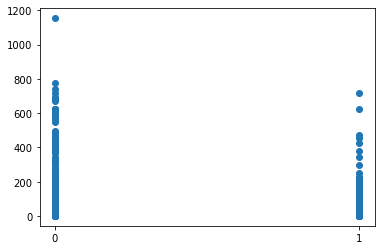

In [123]:
plt.scatter(x = FC_item_std['CORP_ID'], y = FC_item_std['std'])
plt.show()

In [127]:
data_points = FC_item_std.values
kmeans = KMeans(n_clusters=4).fit(data_points)
kmeans.labels_

array([2, 0, 0, ..., 0, 2, 1])

In [129]:
FC_item_std['cluster_id'] = kmeans.labels_
FC_item_std

,std,CORP_ID,cluster_id
ITEM_CD,,,
0001,89.043373,0,2
0003,0.548319,0,0
00062,0.235702,1,0
00083,0.235702,1,0
00085,0.235702,1,0
...,...,...,...
shop0001678,1.028992,1,0
shop0001679,1.338226,1,0
shop0001680,0.323381,1,0


In [147]:
FC_item_cluster = FC_item_std[['cluster_id']]
FC_item_cluster = FC_item_cluster.reset_index()
FC_item_cluster

,ITEM_CD,cluster_id
0,0001,2
1,0003,0
2,00062,0
3,00083,0
4,00085,0
...,...,...
16946,shop0001678,0
16947,shop0001679,0
16948,shop0001680,0
16949,whole800001,2


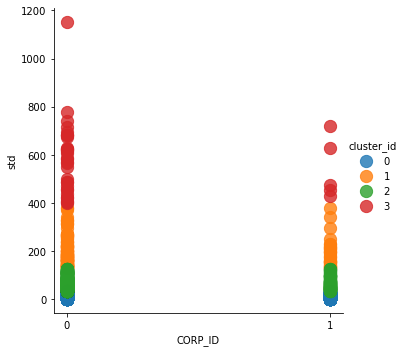

In [133]:
sns.lmplot('CORP_ID', 'std', data = FC_item_std, fit_reg = False, scatter_kws={"s":150}, hue="cluster_id")

In [150]:
allFC_df

,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
0,0,7,20210303,35510,22400.000000,134265392,1,14900.000000,1.0,7484,5Z73,1,3.0,N,세종특별자치시,S,서울특별시,서대문구
1,0,7,20210303,35521,20900.000000,4610261043_2,1,20900.000000,1.0,6427,6R67,4,50.0,N,경기도,광주시,경상남도,김해시
2,0,7,20210303,35513,37900.000000,4936599538_1,1,37900.000000,1.0,6158,9Y25,0,53.0,N,경기도,광주시,경상남도,거제시
3,0,7,20210303,35608,69800.000000,3858391637_1,1,69800.000000,1.0,8909,1N65,1,6.0,N,경기도,광주시,서울특별시,서초구
4,0,7,20210303,35551,73700.000000,4631307460,1,39800.000000,1.0,2777,3D84,1,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676907,1,7,20210628,91210,73518.623345,00281,100,53957.716636,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,S
676908,1,7,20210628,91210,73518.623345,00316,168,53957.716636,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,S
676909,1,7,20210628,91210,73518.623345,00338,100,53957.716636,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,S
676910,1,7,20210628,91210,73518.623345,00183,50,53957.716636,1.0,8981,5F20,1,10.0,N,경기도,군포시,경기도,S


In [148]:
cluster_merge = pd.merge(allFC_df, FC_item_cluster, how = 'outer', on = 'ITEM_CD')

In [162]:
for i in range(4):
    cluster_m = cluster_merge[cluster_merge['cluster_id'] == i]
    cluster_m.to_csv("cluster_{}.csv".format(i), sep=',', index = False)

In [163]:
cluster_0 = pd.read_csv('cluster_0.csv')
cluster_1 = pd.read_csv('cluster_1.csv')
cluster_2 = pd.read_csv('cluster_2.csv')
cluster_3 = pd.read_csv('cluster_3.csv')

In [169]:
cluster_3 = cluster_3[['BKG_DATE', 'ITEM_CD']]

In [174]:
cluster_3.groupby(['BKG_DATE', 'ITEM_CD']).size().unstack(fill_value = 0)

ITEM_CD,232155349_1,2475138283,3681859516,4586602884_10,4586602884_11,4658408144_1,4658408144_10,4658408144_14,4658408144_7,4658433412_2,...,5511432215_6,5569305322_10,5569305322_11,5569305322_2,5569305322_7,5584261925_1,5609144630_4,8809528221117,8809528221414,8809641652409
BKG_DATE,,,,,,,,,,,,,,,,,,,,,
20210301,0,93,0,0,0,473,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210302,0,96,0,0,0,387,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210303,0,70,0,0,0,332,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210304,0,260,0,0,0,280,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20210305,0,556,0,0,0,178,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20210626,87,42,1,0,0,66,0,0,0,0,...,0,0,0,0,0,0,0,118,93,102
20210627,156,77,8,0,0,69,0,0,0,0,...,0,0,0,0,0,0,0,136,154,131
20210628,188,46,5,0,0,92,0,0,0,0,...,0,0,1,0,0,0,1,148,135,137


## 4A70 터미널 FC별 품목 개수 확인하기

In [138]:
DLV_4A70 = allFC_df[allFC_df['DLVCLSFCD']=='4A70']
DLV_4A70_ext = DLV_4A70[['CORP_ID', 'ITEM_CD']]

In [139]:
DLV_4A70_FC = DLV_4A70_ext.groupby(['CORP_ID', 'ITEM_CD']).size().unstack(fill_value = 0)
DLV_4A70_FC

ITEM_CD,0001,100026,100032,100033,100034,100119,100120,100121,100122,100123,...,shop0001644,shop0001645,shop0001647,shop0001648,shop0001649,shop0001652,shop0001670,shop0001673,whole800001,whole800002
CORP_ID,,,,,,,,,,,,,,,,,,,,,
0,4,3,1,1,1,3,2,13,2,13,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,3,1,1,1,1,1,1,1,6,9


In [140]:
DLV_4A70_TF = DLV_4A70_FC != 0
DLV_4A70_TF.sum().sum()

4759

In [141]:
for i in allFC_df['DLVCLSFCD'].unique():
    DLV_i = allFC_df[allFC_df['DLVCLSFCD']==i]
    DLV_i_ext = DLV_i[['CORP_ID', 'ITEM_CD']]
    DLV_i_FC = DLV_i_ext.groupby(['CORP_ID', 'ITEM_CD']).size().unstack(fill_value = 0)
    DLV_i_TF = DLV_i_FC != 0
    DLV_i_total = DLV_i_TF.shape[1]
    if DLV_i_total != DLV_i_TF.sum().sum():
        print("센터간 밸런싱이 필요해요")


어떤 배달 터미널에서든 한 품목이 다른 FC에서 오는 것은 없다!! 
즉, 얘네도 바보짓을 하고 있지는 않다!!

In [142]:
DLV_4A70_FC[DLV_4A70_FC != 0]

ITEM_CD,0001,100026,100032,100033,100034,100119,100120,100121,100122,100123,...,shop0001644,shop0001645,shop0001647,shop0001648,shop0001649,shop0001652,shop0001670,shop0001673,whole800001,whole800002
CORP_ID,,,,,,,,,,,,,,,,,,,,,
0,4.0,3.0,1.0,1.0,1.0,3.0,2.0,13.0,2.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,9.0


In [143]:
DLV_4A70_FC[DLV_4A70_FC.index == '0']

ITEM_CD,0001,100026,100032,100033,100034,100119,100120,100121,100122,100123,...,shop0001644,shop0001645,shop0001647,shop0001648,shop0001649,shop0001652,shop0001670,shop0001673,whole800001,whole800002
CORP_ID,,,,,,,,,,,,,,,,,,,,,
0,4,3,1,1,1,3,2,13,2,13,...,0,0,0,0,0,0,0,0,0,0
